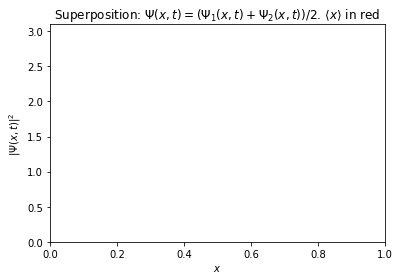

In [7]:
# Box with superposition of two stationary states, ground state and one excited state

import numpy as np
from matplotlib.pyplot import figure,axes,plot,title,xlabel,ylabel,show
from matplotlib.animation import FuncAnimation

def animate_curve_2d(x_lim,y_lim,x_data,y_data,N,plt_cmd,titl,x_label,y_label,xpos):
    fig=figure()
    akse=axes(xlim=x_lim,ylim=y_lim)
    title(titl)
    xlabel(x_label)
    ylabel(y_label)
    line, =plot([],[],plt_cmd)
    pos, =plot([],[],'ro')
    def init():
        line.set_data([],[])
        pos.set_data([],[])
        return line,pos
    def anim(i,x_data,y_data):
        line.set_data(x_data,y_data[i,:])
        pos.set_data(xpos[i],0.1)
        return line,pos
    ani=FuncAnimation(fig,anim,init_func=init,frames=N,fargs=(x_data,y_data),blit=True,interval=10,repeat=False)
    show()
    return ani

# Function to animate superposition of ground state and an excited state (with quantum number n2) of a box.
def animate_superposition(n2):
    x0=0.0
    x1=1.0
    NX=1000
    x=np.arange(NX+1)*(x1-x0)/NX            # Table with x-values
    n1=1                                    # Ground state quantum number
    psi1=np.sqrt(2/x1)*np.sin(n1*np.pi*x/x1)# Ground state eigenfunction
    psi2=np.sqrt(2/x1)*np.sin(n2*np.pi*x/x1)# Excited state eigenfunction

    t0=0
    T=2*np.pi
    NT=1200
    t=np.arange(NT+1)*(T-t0)/NT             # Time table 

    om1=1
    om2=om1*n2**2

    Psisq=np.empty((NT+1,NX+1))
    expectationvalue=np.zeros(NT+1)

    for nt in range(NT+1):
        exp1=np.exp(-1j*om1*t[nt])
        exp2=np.exp(-1j*om2*t[nt])
        Psisq[nt,:]=abs(psi1*exp1+psi2*exp2)**2/2
        s=0
        for i in range(1,NX):
            s+=x[i]*Psisq[nt,i]             # Integration by trapezoidal rule
        expectationvalue[nt]=s*(x1-x0)/NX

    animation = animate_curve_2d((x0,x1),(0,np.max(Psisq)),x,Psisq,NT,'','Superposition: $\Psi(x,t)=(\Psi_{1}(x,t)+\Psi_{%d}(x,t))/2$. $\langle x\\rangle$ in red'%n2,'$x$','$|\Psi(x,t)|^2$',expectationvalue)
    return animation    
 
if __name__=='__main__':
    n2=2        # Choose quantum number for excited state
    animation = animate_superposition(n2)
